## Filter showcase notebook
This notebook demonstrates how to use filters in the qim3d library. There are multiple ways to initialize and apply the filters, which can make filter application more straight forward.

Filtering is done using the `qim3d.filter` module, which include direct application of filters, initialization of filter classes or pipelines.

All filters are used either from the ndimage library or dask library, depending on input arguments. Therefore kwargs include the arguments for these functions.

We start by importing the qim3d library and a volume to apply the filters to.

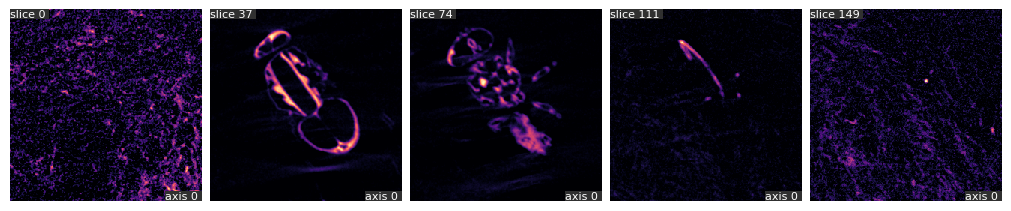

In [1]:
import qim3d

vol = qim3d.examples.fly_150x256x256
qim3d.viz.slices_grid(vol, num_slices=5)

### Direct filter use
Filters can be directly used on a volume, resulting in a filtered volume. This is demonstrated with the `gaussian` and `median` filter.

In [13]:
### Gaussian filter
vol_gaussian = qim3d.filters.gaussian(vol, sigma=3)

### Median filter
vol_median = qim3d.filters.median(vol, size=5)

### Filter classes
The filter can also be instantiated with the filter class, which can then be applied to a volume. This is demonstrated with the `Maximum` filter class. Notice that the class of the filter has a capital first letter.

In [24]:
gaussian_fn = qim3d.filters.Maximum(size=5)
vol_maximum = gaussian_fn(vol)

## Using filter classes to construct a pipeline of filters
When more than one filter is needed, a pipeline can be created. This makes it easy to reapply multiple filters to different volumes. This is demonstrated with the `Maximum` and `Minumum` filter classes.

In [31]:
pipeline = qim3d.filters.Pipeline(
    qim3d.filters.Maximum(size=3),
    qim3d.filters.Minimum(size=10))
vol_pipeline = pipeline(vol)

Filter functions can also be appended to the sequence after defining the class instance. This is demonstrated by appending a `Tophat` filter to the pipeline.

In [32]:
pipeline.append(qim3d.filters.Tophat(size=5))
vol_pipeline2 = pipeline(vol)

To get an overview of the filters in a pipeline, we can access the `filters` dictionary in the pipeline:

In [33]:
print(pipeline.filters)

{'0': <qim3d.filters._common_filter_methods.Maximum object at 0x7fe329e43f10>, '1': <qim3d.filters._common_filter_methods.Minimum object at 0x7fe32a1b3e10>, '2': <qim3d.filters._common_filter_methods.Tophat object at 0x7fe329e3c210>}
